# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Explore dataset

In [ ]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
^C


In [ ]:
#set the path to the main dir
import os
#main_dir = "/content/datasets/Data"
main_dir = "/content/drive/MyDrive/datasets-master/Data"
#set the path to the train dir
train_dir = os.path.join(main_dir,'train')
#set the path to the test dir
test_dir = os.path.join(main_dir,'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir,'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir,'NORMAL')

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir,'COVID19')

#directory with the testing normal images
test_normal_dir = os.path.join(test_dir,'NORMAL')


In [ ]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(486).jpg', 'COVID19(68).jpg', 'COVID19(535).jpg', 'COVID-19 (18).jpeg', 'COVID19(202).jpg', 'COVID19(413).jpg', 'COVID19(470).jpg', 'COVID19(156).jpg', 'COVID19(280).jpg', 'COVID19(422).jpg']
['NORMAL(661).jpg', 'NORMAL(1476).jpg', 'NORMAL(1541).jpg', 'NORMAL(212).jpg', 'NORMAL(686).jpg', 'NORMAL(185).jpg', 'NORMAL(398).jpg', 'NORMAL(1295).jpg', 'NORMAL(1325).jpg', 'NORMAL(1176).jpg']
['COVID19(437).jpg', 'COVID-19 (642).jpg', 'COVID-19 (570).jpg', 'COVID19(304).jpg', 'COVID19(160).jpg', 'COVID19(182).jpg', 'COVID19(269).jpg', 'COVID-19 (461).jpg', 'COVID19(128).jpg', 'COVID19(499).jpg']
['NORMAL(1043).jpg', 'NORMAL(632).jpg', 'NORMAL(947).jpg', 'NORMAL(257).jpg', 'NORMAL(329).jpg', 'NORMAL(1098).jpg', 'NORMAL(593).jpg', 'NORMAL(731).jpg', 'NORMAL(476).jpg', 'NORMAL(1282).jpg']


In [ ]:
#print the total no of images present in each dir
print("Total images present in the training set:",len(train_covid_names+train_normal_names))
print("Total images present in the testing set:",len(test_covid_names+test_normal_names))

Total images present in the training set: 1811
Total images present in the testing set: 484


# Data Visualization

['/content/drive/MyDrive/datasets-master/Data/train/COVID19/COVID19(486).jpg', '/content/drive/MyDrive/datasets-master/Data/train/COVID19/COVID19(68).jpg', '/content/drive/MyDrive/datasets-master/Data/train/COVID19/COVID19(535).jpg', '/content/drive/MyDrive/datasets-master/Data/train/COVID19/COVID-19 (18).jpeg', '/content/drive/MyDrive/datasets-master/Data/train/COVID19/COVID19(202).jpg', '/content/drive/MyDrive/datasets-master/Data/train/COVID19/COVID19(413).jpg', '/content/drive/MyDrive/datasets-master/Data/train/COVID19/COVID19(470).jpg', '/content/drive/MyDrive/datasets-master/Data/train/COVID19/COVID19(156).jpg']
['/content/drive/MyDrive/datasets-master/Data/train/NORMAL/NORMAL(661).jpg', '/content/drive/MyDrive/datasets-master/Data/train/NORMAL/NORMAL(1476).jpg', '/content/drive/MyDrive/datasets-master/Data/train/NORMAL/NORMAL(1541).jpg', '/content/drive/MyDrive/datasets-master/Data/train/NORMAL/NORMAL(212).jpg', '/content/drive/MyDrive/datasets-master/Data/train/NORMAL/NORMAL(68

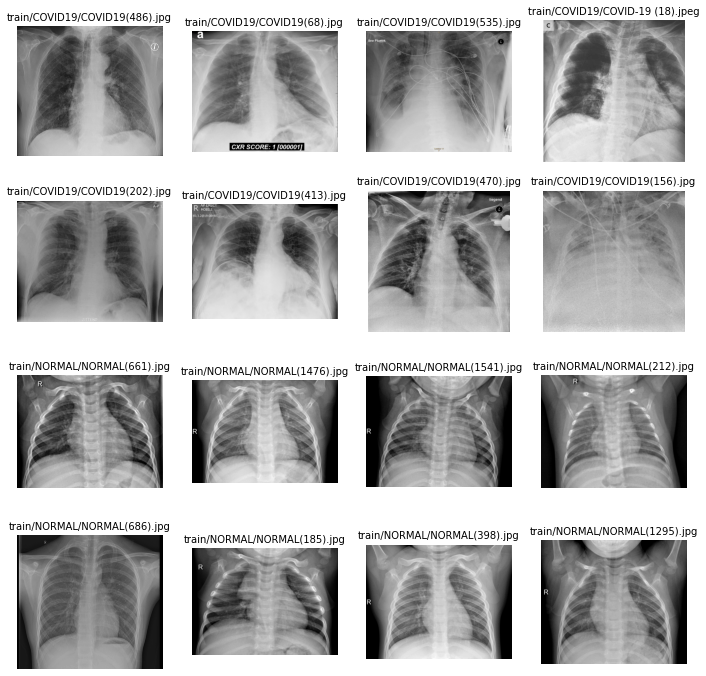

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg

#set the number of columns and rows
rows = 4
cols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir,filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir,filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list = covid_pic +normal_pic
for i, img_path in enumerate(merged_list):
  data = img_path.split("/",6)[6]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize = 10)
  plt.imshow(img,cmap="gray")
plt.show()

# Data Preprocessing & Augmentation

In [ ]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation=ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')


validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')


test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# Build Convolutional Neural Network Model

In [ ]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding = 'SAME',activation='relu',input_shape = (150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding = 'SAME',activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size =(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
#compile the model
model.compile(Adam(lr = 0.001),loss = 'binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#train the model
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator
                    )

Epoch 1/30
46/46 [==============================] - 725s 15s/step - loss: 1.5000 - accuracy: 0.6963 - val_loss: 0.3330 - val_accuracy: 0.8923
Epoch 2/30
46/46 [==============================] - 47s 1s/step - loss: 0.2999 - accuracy: 0.8744 - val_loss: 0.2325 - val_accuracy: 0.9448
Epoch 3/30
46/46 [==============================] - 46s 1s/step - loss: 0.2082 - accuracy: 0.9220 - val_loss: 0.1894 - val_accuracy: 0.9392
Epoch 4/30
46/46 [==============================] - 46s 1s/step - loss: 0.1880 - accuracy: 0.9337 - val_loss: 0.1720 - val_accuracy: 0.9392
Epoch 5/30
46/46 [==============================] - 46s 985ms/step - loss: 0.1698 - accuracy: 0.9406 - val_loss: 0.1397 - val_accuracy: 0.9613
Epoch 6/30
46/46 [==============================] - 46s 1s/step - loss: 0.1593 - accuracy: 0.9455 - val_loss: 0.1236 - val_accuracy: 0.9586
Epoch 7/30
46/46 [==============================] - 46s 1s/step - loss: 0.1456 - accuracy: 0.9496 - val_loss: 0.1247 - val_accuracy: 0.9503
Epoch 8/30
46/4

# Performance Evaluation

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

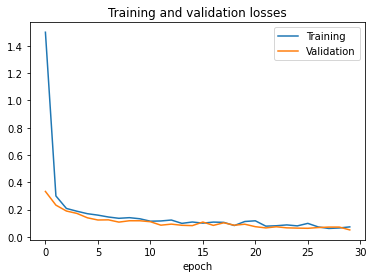

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

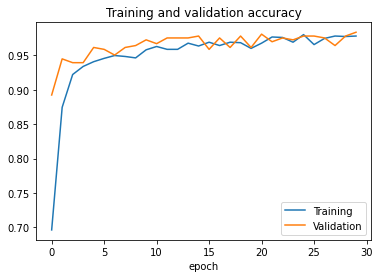

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')


In [ ]:
# get the test acuarcy and loss
test_loss,test_acc = model.evaluate(test_generator)
print('test loss :{} test acc:{}'.format(test_loss,test_acc))

16/16 [==============================] - 170s 11s/step - loss: 0.0828 - accuracy: 0.9752
test loss :0.08282104879617691 test acc:0.9752066135406494


In [ ]:
model.save("covidDetection.h5")

# Prediction 


In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/' +filename
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images= np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(filename)
  if prediction == 0:
    print("covid postive")
  else:
    print("covid negative")